# Selection of the best model setting for predicting Statistical Parity, Equal Opportunity and Average Odds

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_theme(style="whitegrid", font_scale=1.5, context="paper")

In [28]:
def plot_data(data_symp, data_meta, data_all, title):
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    for data, label, linestyle in zip(
        [
            data_symp["Statistical Parity"].values,
            data_meta["Statistical Parity"].values,
            data_all["Statistical Parity"].values,
        ],
        ["Symptoms", "Metafeatures", "Both"],
        ["-", "--", "dotted"],
    ):
        ax[0].plot(data, label=label, linestyle=linestyle)

    for data, label, linestyle in zip(
        [
            data_symp["Equal Opportunity"].values,
            data_meta["Equal Opportunity"].values,
            data_all["Equal Opportunity"].values,
        ],
        ["Symptoms", "Metafeatures", "Both"],
        ["-", "--", "dotted"],
    ):
        ax[1].plot(data, label=label, linestyle=linestyle)

    for data, label, linestyle in zip(
        [
            data_symp["Average Odds"].values,
            data_meta["Average Odds"].values,
            data_all["Average Odds"].values,
        ],
        ["Symptoms", "Metafeatures", "Both"],
        ["-", "--", "dotted"],
    ):
        ax[2].plot(data, label=label, linestyle=linestyle)

    ax[0].set_title("Statistical Parity")
    ax[1].set_title("Equal Opportunity")
    ax[2].set_title("Average Odds")

    plt.legend(
        loc="lower right",
        bbox_to_anchor=(-0.1, -0.2),
        ncol=3,
    )

    plt.suptitle(title)
    # plt.subplots_adjust(wspace=0.3, hspace=0.3)
    # plt.tight_layout()
    plt.savefig(os.path.join("figs", title + ".pdf"))
    plt.savefig(os.path.join("figs", title + ".png"), dpi=300)
    plt.show()

In [29]:
def barplot(data, title):
    fig, ax = plt.subplots(1, 3, figsize=(10, 5), sharey=True)
    bar1 = sns.barplot(
        y="Statistical Parity",
        x="Model",
        data=data,
        ax=ax[0],
        legend=False,
        errorbar="sd",
        fill=False,
        color="black",
    )
    bar2 = sns.barplot(
        y="Equal Opportunity",
        x="Model",
        data=data,
        ax=ax[1],
        legend=False,
        errorbar="sd",
        color="black",
        fill=False,
    )
    bar3 = sns.barplot(
        y="Average Odds",
        x="Model",
        data=data,
        ax=ax[2],
        legend=False,
        errorbar="sd",
        color="black",
        fill=False,
    )

    # Set hatch for each bar
    hatches = ["/", "\\", "o", "|", "*"]
    for i, bar in enumerate(bar1.patches):
        bar.set_hatch(hatches[i % len(hatches)])
    for i, bar in enumerate(bar2.patches):
        bar.set_hatch(hatches[i % len(hatches)])
    for i, bar in enumerate(bar3.patches):
        bar.set_hatch(hatches[i % len(hatches)])

    ax[0].set_title("Statistical Parity")
    ax[1].set_title("Equal Opportunity")
    ax[2].set_title("Average Odds")
    ax[0].set_ylabel(title)
    ax[1].set_ylabel("")
    ax[2].set_ylabel("")
    plt.suptitle(title)
    plt.tight_layout()
    plt.savefig(os.path.join("figs", title + ".pdf"))
    plt.savefig(os.path.join("figs", title + ".png"), dpi=300)

    plt.show()

## Multilinear Perceptron Regression

In [30]:
mlp_rmse_all = pd.read_csv(
    os.path.join("model_scores", "mlp", "mlp_rmse_scores_all_features.csv")
)
mlp_rmse_meta = pd.read_csv(
    os.path.join("model_scores", "mlp", "mlp_rmse_scores_metafeatures.csv")
)
mlp_rmse_symp = pd.read_csv(
    os.path.join("model_scores", "mlp", "mlp_rmse_scores_bias_symptoms.csv")
)

In [31]:
mlp_r2_all = pd.read_csv(
    os.path.join("model_scores", "mlp", "mlp_r2_scores_all_features.csv")
)
mlp_r2_meta = pd.read_csv(
    os.path.join("model_scores", "mlp", "mlp_r2_scores_metafeatures.csv")
)
mlp_r2_symp = pd.read_csv(
    os.path.join("model_scores", "mlp", "mlp_r2_scores_bias_symptoms.csv")
)

### Results with RMSE

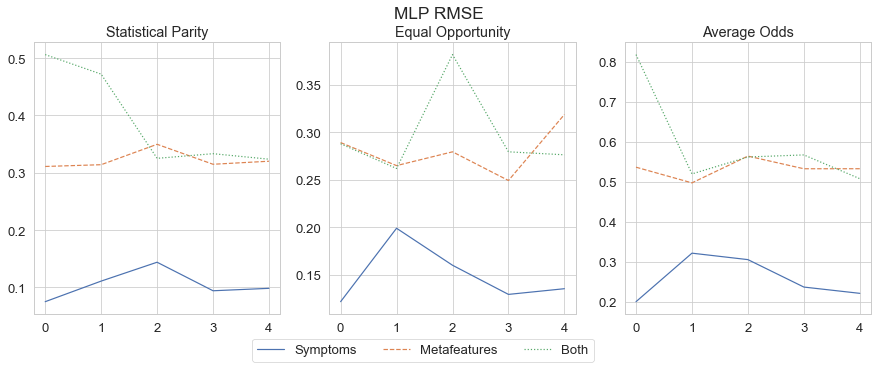

In [32]:
plot_data(mlp_rmse_symp, mlp_rmse_meta, mlp_rmse_all, "MLP RMSE")

### Results with R2

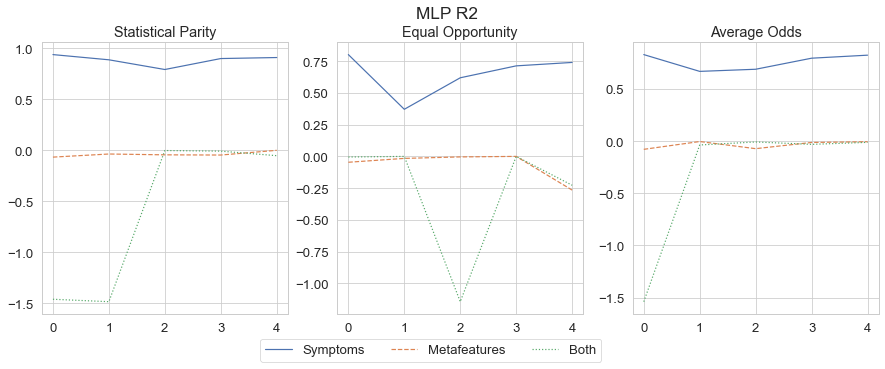

In [33]:
plot_data(mlp_r2_symp, mlp_r2_meta, mlp_r2_all, "MLP R2")

## XGBoost

In [34]:
xgb_rmse_bias= pd.read_csv(os.path.join("model_scores", "xgb", "xgb_rmse_scores_bias_symptoms.csv"))
xgb_rmse_meta = pd.read_csv(os.path.join("model_scores", "xgb", "xgb_rmse_scores_metafeatures.csv"))
xgb_rmse_all = pd.read_csv(os.path.join("model_scores", "xgb", "xgb_rmse_scores_all_features.csv"))

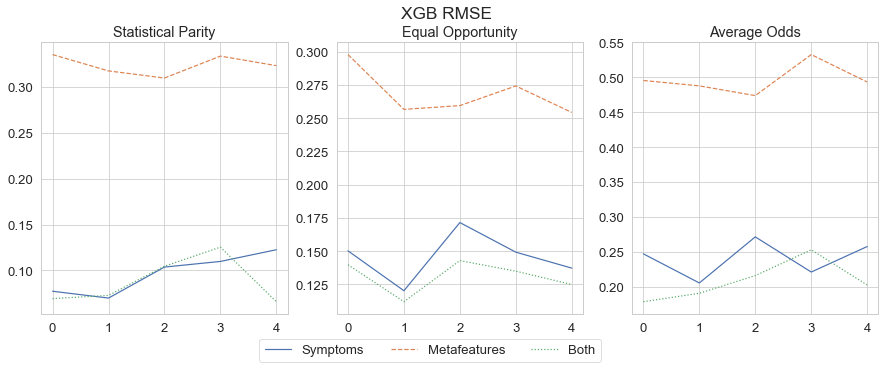

In [35]:
plot_data(xgb_rmse_bias, xgb_rmse_meta, xgb_rmse_all, "XGB RMSE")

In [36]:
xgb_r2_bias= pd.read_csv(os.path.join("model_scores", "xgb", "xgb_r2_scores_bias_symptoms.csv"))
xgb_r2_meta = pd.read_csv(os.path.join("model_scores", "xgb", "xgb_r2_scores_metafeatures.csv"))
xgb_r2_all = pd.read_csv(os.path.join("model_scores", "xgb", "xgb_r2_scores_all_features.csv"))

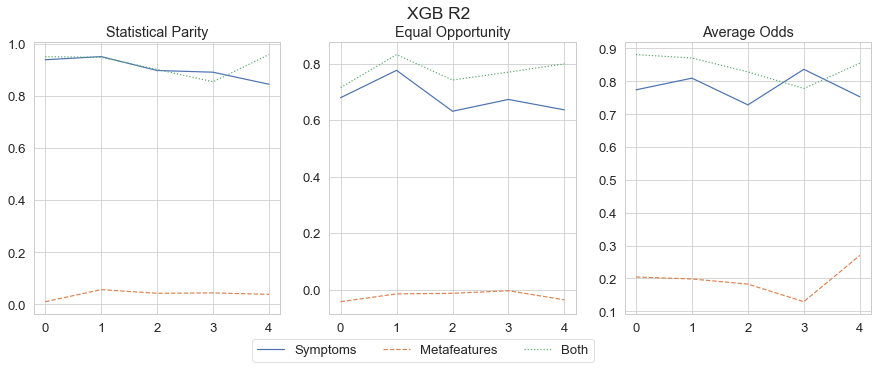

In [37]:
plot_data(xgb_r2_bias, xgb_r2_meta, xgb_r2_all, "XGB R2")

## Random Forest

In [38]:
rf_rmse_bias= pd.read_csv(os.path.join("model_scores", "rf", "rf_rmse_scores_bias_symptoms.csv"))
rf_rmse_meta = pd.read_csv(os.path.join("model_scores", "rf", "rf_rmse_scores_metafeatures.csv"))
rf_rmse_all = pd.read_csv(os.path.join("model_scores", "rf", "rf_rmse_scores_all_features.csv"))

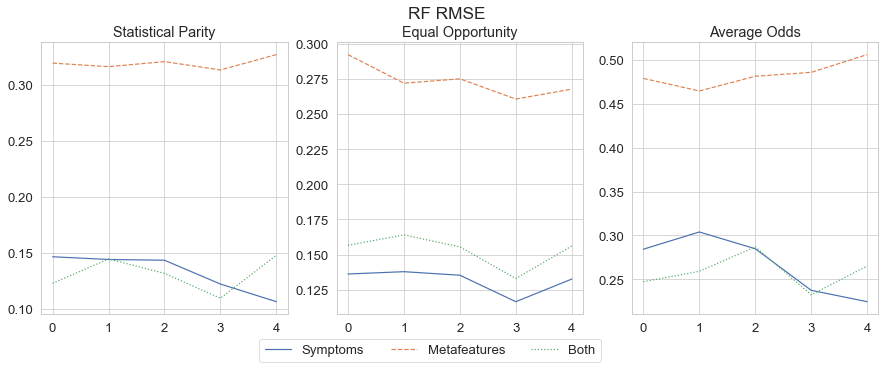

In [39]:
plot_data(rf_rmse_bias, rf_rmse_meta, rf_rmse_all, "RF RMSE")

In [40]:
rf_r2_bias= pd.read_csv(os.path.join("model_scores", "rf", "rf_r2_scores_bias_symptoms.csv"))
rf_r2_meta = pd.read_csv(os.path.join("model_scores", "rf", "rf_r2_scores_metafeatures.csv"))
rf_r2_all = pd.read_csv(os.path.join("model_scores", "rf", "rf_r2_scores_all_features.csv"))

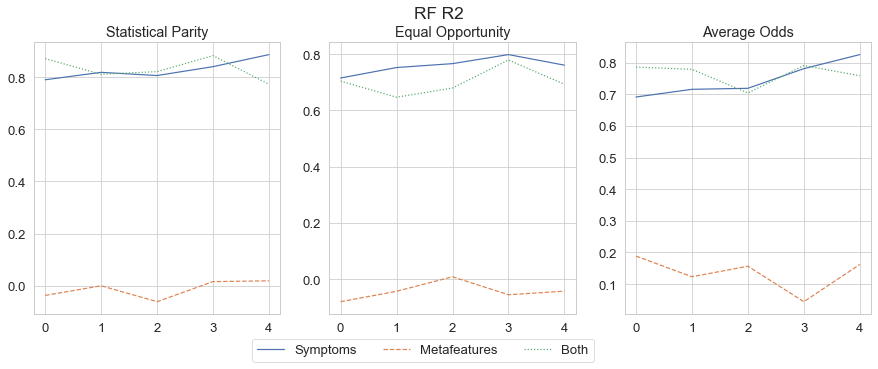

In [41]:
plot_data(rf_r2_bias, rf_r2_meta, rf_r2_all, "RF R2")

# Comparison of the best model settings

Selected models:

- Multilayer Perceptron trained with only bias symptoms
- XGBoost regressor trained with bias symptoms and automl metafeatures

In [47]:
mlp_rmse_symp['Model'] = 'MLP'
mlp_r2_symp['Model'] = 'MLP'
xgb_r2_all['Model'] = 'XGB'
xgb_rmse_all['Model'] = 'XGB'
rf_rmse_bias['Model'] = 'RF'
rf_r2_bias['Model'] = 'RF'
full_data_rmse = pd.concat([mlp_rmse_symp, xgb_rmse_all, rf_rmse_bias])
full_data_r2 = pd.concat([mlp_r2_symp, xgb_r2_all, rf_r2_bias])

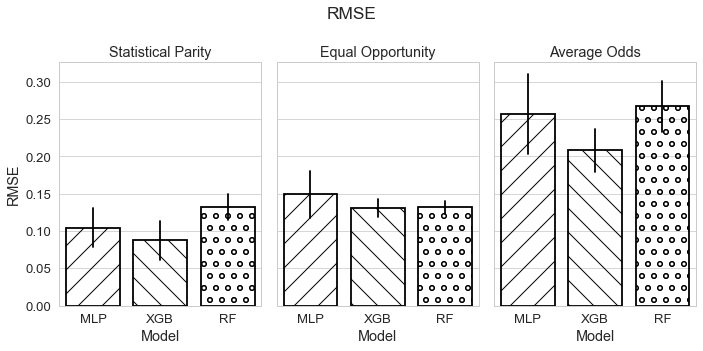

In [48]:
barplot(full_data_rmse, "RMSE")

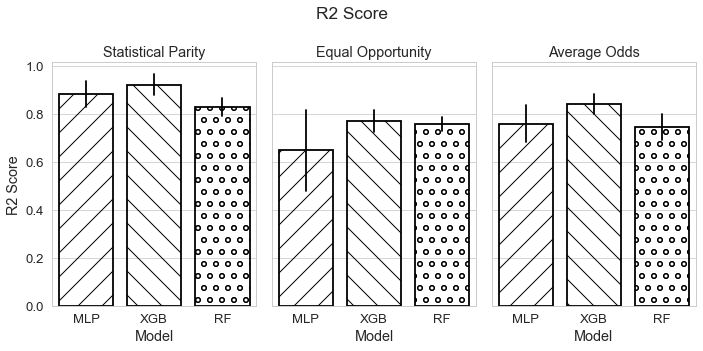

In [49]:
barplot(full_data_r2, "R2 Score")